In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import accuracy_score,r2_score

Data collection and Processing

In [2]:
car_data = pd.read_csv(r"D:\Visual Studio Code\ML\DataSet\Car_prediction_Dataset\car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
#checking the number of row and columns
car_data.shape

(301, 9)

In [4]:
#Extracting data set info
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#Checking for data has any null value or not
car_data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
#Checking the distribution of categorical value for Fuel Type
print(car_data.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [7]:
#Checking the distribution of value in Seller_Type
print(car_data.Seller_Type.value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [8]:
#Checking the distribution of value in Transmission
print(car_data.Transmission.value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [9]:
#Encode the value

car_data.replace({'Fuel_Type':{'Petrol':0 , 'Diesel': 1 , 'CNG': 2},'Seller_Type':{'Dealer':0,'Individual': 1},'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21156\623253843.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0 , 'Diesel': 1 , 'CNG': 2},'Seller_Type':{'Dealer':0,'Individual': 1},'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [10]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [11]:
#Spliting the data into test and training data
x = car_data.drop(columns=['Car_Name','Selling_Price'],axis = 1)
y = car_data['Selling_Price']

In [12]:
#Now spliting the data into training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.1)

# Model Training


## Linear Regressing Model

In [13]:
#Calling linear_regressing model
linear_model  = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [14]:
#Checking how our model is predicting

linear_model_pred = linear_model.predict(x_train)
#Checking the error
error_score = r2_score(y_train,linear_model_pred)
print("Error Score: ",error_score)

Error Score:  0.8799451660493708


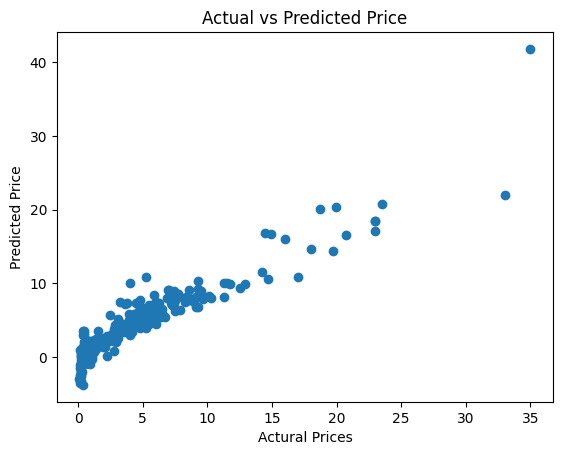

In [15]:
#Creating the graph 

plt.scatter(y_train,linear_model_pred)
plt.xlabel("Actural Prices")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

Error Score:  0.8365766715026374


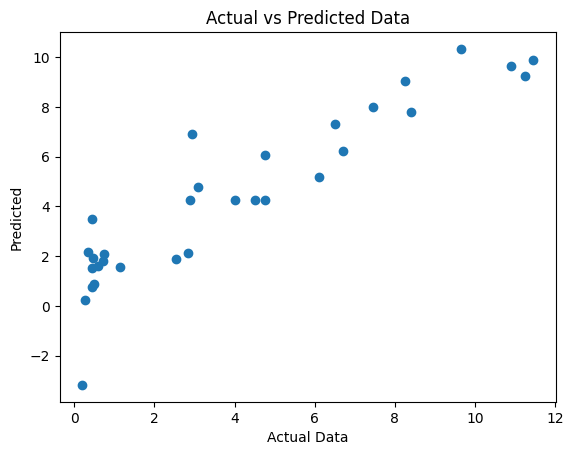

In [16]:
#Now doing the prediction on test data
test_pred = linear_model.predict(x_test)
#Check for error score
error_score = r2_score(y_test,test_pred)
print("Error Score: ",error_score)

#Create Graph
plt.scatter(y_test,test_pred)
plt.xlabel("Actual Data")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Data")
plt.show()

## Lasso Regression 

In [17]:
model = Lasso()
model.fit(x_train,y_train)

Lasso()

In [18]:
training_pred = model.predict(x_train)
#Error finding 
error_score = r2_score(y_train,training_pred)
print("Error Score: ",error_score)

Error Score:  0.8427856123435794


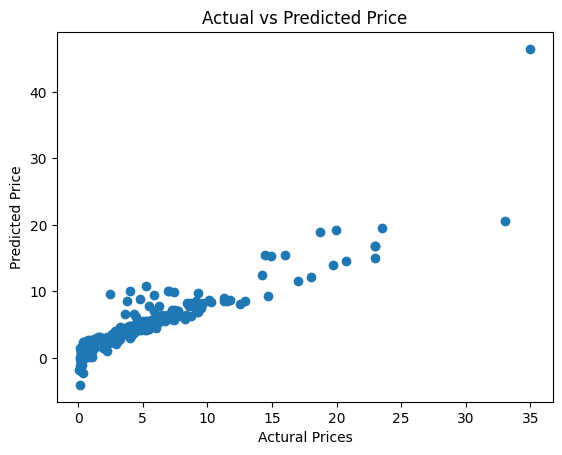

In [19]:
#Creating the graph 

plt.scatter(y_train,training_pred)
plt.xlabel("Actural Prices")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

Error Score:  0.8709167941173195


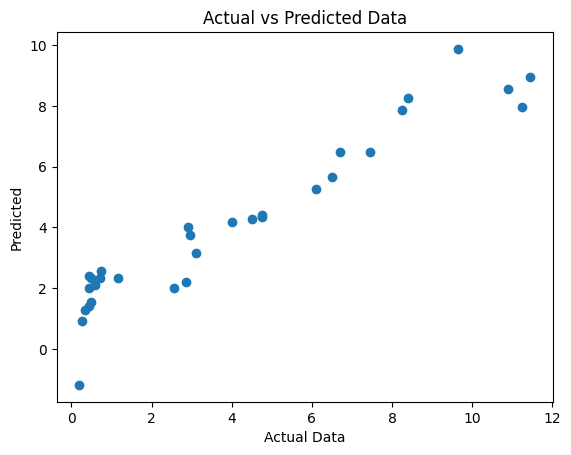

In [20]:
#Now doing the prediction on test data
test_pred = model.predict(x_test)
#Check for error score
error_score = r2_score(y_test,test_pred)
print("Error Score: ",error_score)

#Create Graph
plt.scatter(y_test,test_pred)
plt.xlabel("Actual Data")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Data")
plt.show()